In [133]:
from util_plot import *
from util_feature import * 
from util_other import *
from util_model import * 
%matplotlib inline
#!pip install arrow
from sklearn.preprocessing import Imputer
import util_plot 
import util_feature 
import util_other 
import util_model 
import util_date
import util_csv
import warnings
warnings.filterwarnings("ignore")

In [0]:

#util_model.

In [0]:

file_path = 'data/shopping_time'
#file_path = ""
#content/order_items.csv
#content/train_trips.csv
#content/test_trips.csv

In [0]:
# Unzip all the docs as csv obviously

order_items = file_path+'order_items.csv'
train_trips = file_path+'train_trips.csv'
test_trips = file_path+'test_trips.csv'

In [0]:

df_order_items = pd.read_csv(order_items, delimiter=',')
df_train_trips = pd.read_csv(train_trips, delimiter=',')
df_list_test_trips = pd.read_csv(test_trips, delimiter=',')
#df_list_test_trips = util_feature.col_remove()
list_dataframes = [df_order_items, df_train_trips, df_list_test_trips]

df_train = pd.merge(df_order_items, df_train_trips, on='trip_id')
df_test = pd.merge(df_order_items, df_list_test_trips, on='trip_id')


In [0]:
####  USE THIS
colnum = [ 'quantity']
colcat = ['department_name','fulfillment_model']
coldate = ['shopping_started_at','shopping_ended_at']
colid = ['trip_id', 'item_id', 'shopper_id','store_id']
coltext =  None


In [139]:

df_train  = util_feature.pd_col_to_onehot(df = df_train, colname = colcat)
df_test  = util_feature.pd_col_to_onehot(df = df_test, colname = colcat)

department_name 83 (1859920, 9)
fulfillment_model 2 (1859920, 91)
department_name 79 (180366, 8)
fulfillment_model 2 (180366, 86)


In [140]:
df_frames = [df_train, df_test]

df_full_date = pd.concat(df_frames,sort=False, join='inner')

df_full_date.head()

,trip_id,item_id,quantity,shopper_id,fulfillment_model,store_id,shopping_started_at,department_name_25% OFF Supplements 8/14-8/16,department_name_4th of July,department_name_Academy Awards,department_name_Alcohol,department_name_All It Takes to Bake!,department_name_Aquatics,department_name_BBQ Favorites,department_name_Babies,department_name_Bakery,department_name_Beverages,department_name_Bi-Rite Creamery,department_name_Bi-Rite's Winter Favorites!,department_name_Breakfast,department_name_Bulk,department_name_Burning Man Essentials,department_name_Business Items,department_name_Buyers' Picks,department_name_Canned Goods,department_name_Cat,department_name_Cheese,department_name_Christmas & NYE Menu,department_name_Dairy & Eggs,department_name_Deli,department_name_Dog,department_name_Dry Goods & Pasta,"department_name_Fall Wine, Beer, & Spirits",department_name_Father's Day,department_name_Fill the Grill,department_name_Find it at Target,department_name_FitMarket,department_name_Floral,department_name_Fromagerie,department_name_Frozen,...,department_name_Hanukkah,department_name_Healthy Choices for 2016,department_name_Healthy Eating,department_name_Holiday,department_name_Holiday Essentials,department_name_Holiday Favorites,department_name_Holiday Turkeys,department_name_Holidays,department_name_Household,department_name_International,department_name_Local,department_name_Local Favorites,department_name_Meat & Seafood,department_name_Mother's Day,department_name_New Year's Eve Extravaganza!,department_name_Newly Added,"department_name_Olives, Gourmet Cheese, Salads",department_name_Our Brands,department_name_Pantry,department_name_Personal Care,department_name_Pets,department_name_Popular,department_name_Produce,department_name_Reptile,department_name_Rosh Hashanah & Yom Kippur,department_name_Seasonal,department_name_Small Animal,department_name_Smoothie Central,department_name_Snacks,department_name_St. Patrick's Day Specials,department_name_Star Wars,department_name_Summer Drinks,department_name_Super Bowl Party,department_name_TEST SPECIAL AISLE,department_name_Thanksgiving,department_name_Thanksgiving A to Z,department_name_Travel,department_name_Valentine's Day Specials,department_name_Valentine's- Made with Love!,department_name_Vitamins & Supplements
0,3119513,368671,10.0,3775,0,1,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3119513,1832360,4.0,3775,0,1,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3119513,1914422,2.0,3775,0,1,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3119513,1830569,2.0,3775,0,1,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3119513,1162302,4.0,3775,0,1,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_full_date_copy = df_full_date.copy()
colcat_1hot_ =   util_feature.pd_col_remove(df_full_date_copy,colid)
colcat_1hot_ =   util_feature.pd_col_remove(colcat_1hot_,colcat)
colcat_1hot_ =   util_feature.pd_col_remove(colcat_1hot_,colnum)
colcat_1hot_ =   util_feature.pd_col_remove(colcat_1hot_,coldate)
colcat_1hot=colcat_1hot_.columns
df_full_date = df_full_date.fillna(0)



In [0]:
df_full_date = util_feature.pd_col_remove(df_full_date,colid)

In [143]:
df_full_date = util_feature.pd_col_normalize(df_full_date, colnum, colproba= colnum)

quantity -1.0498221244986774 6.216805681965679
quantity


In [144]:
util_feature.pd_col_fill_na(df_full_date, colcat_1hot,0)

there are 0 empty values in department_name_25% OFF Supplements 8/14-8/16
there are 0 empty values in department_name_4th of July
there are 0 empty values in department_name_Academy Awards
there are 0 empty values in department_name_Alcohol
there are 0 empty values in department_name_All It Takes to Bake!
there are 0 empty values in department_name_Aquatics
there are 0 empty values in department_name_BBQ Favorites
there are 0 empty values in department_name_Babies
there are 0 empty values in department_name_Bakery
there are 0 empty values in department_name_Beverages
there are 0 empty values in department_name_Bi-Rite Creamery
there are 0 empty values in department_name_Bi-Rite's Winter Favorites!
there are 0 empty values in department_name_Breakfast
there are 0 empty values in department_name_Bulk
there are 0 empty values in department_name_Burning Man Essentials
there are 0 empty values in department_name_Business Items
there are 0 empty values in department_name_Buyers' Picks
there 

,quantity,fulfillment_model,shopping_started_at,department_name_25% OFF Supplements 8/14-8/16,department_name_4th of July,department_name_Academy Awards,department_name_Alcohol,department_name_All It Takes to Bake!,department_name_Aquatics,department_name_BBQ Favorites,department_name_Babies,department_name_Bakery,department_name_Beverages,department_name_Bi-Rite Creamery,department_name_Bi-Rite's Winter Favorites!,department_name_Breakfast,department_name_Bulk,department_name_Burning Man Essentials,department_name_Business Items,department_name_Buyers' Picks,department_name_Canned Goods,department_name_Cat,department_name_Cheese,department_name_Christmas & NYE Menu,department_name_Dairy & Eggs,department_name_Deli,department_name_Dog,department_name_Dry Goods & Pasta,"department_name_Fall Wine, Beer, & Spirits",department_name_Father's Day,department_name_Fill the Grill,department_name_Find it at Target,department_name_FitMarket,department_name_Floral,department_name_Fromagerie,department_name_Frozen,department_name_Game Day Specials,department_name_Gifts for the Foodie,department_name_Halloween,department_name_Hanukkah,department_name_Healthy Choices for 2016,department_name_Healthy Eating,department_name_Holiday,department_name_Holiday Essentials,department_name_Holiday Favorites,department_name_Holiday Turkeys,department_name_Holidays,department_name_Household,department_name_International,department_name_Local,department_name_Local Favorites,department_name_Meat & Seafood,department_name_Mother's Day,department_name_New Year's Eve Extravaganza!,department_name_Newly Added,"department_name_Olives, Gourmet Cheese, Salads",department_name_Our Brands,department_name_Pantry,department_name_Personal Care,department_name_Pets,department_name_Popular,department_name_Produce,department_name_Reptile,department_name_Rosh Hashanah & Yom Kippur,department_name_Seasonal,department_name_Small Animal,department_name_Smoothie Central,department_name_Snacks,department_name_St. Patrick's Day Specials,department_name_Star Wars,department_name_Summer Drinks,department_name_Super Bowl Party,department_name_TEST SPECIAL AISLE,department_name_Thanksgiving,department_name_Thanksgiving A to Z,department_name_Travel,department_name_Valentine's Day Specials,department_name_Valentine's- Made with Love!,department_name_Vitamins & Supplements
0,0.387167,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.262070,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.181991,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.181991,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.262070,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.262070,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.387167,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.387167,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.387167,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [145]:
#df_full_date  = df_full_date.dropna()
df_full_date.head()

,quantity,fulfillment_model,shopping_started_at,department_name_25% OFF Supplements 8/14-8/16,department_name_4th of July,department_name_Academy Awards,department_name_Alcohol,department_name_All It Takes to Bake!,department_name_Aquatics,department_name_BBQ Favorites,department_name_Babies,department_name_Bakery,department_name_Beverages,department_name_Bi-Rite Creamery,department_name_Bi-Rite's Winter Favorites!,department_name_Breakfast,department_name_Bulk,department_name_Burning Man Essentials,department_name_Business Items,department_name_Buyers' Picks,department_name_Canned Goods,department_name_Cat,department_name_Cheese,department_name_Christmas & NYE Menu,department_name_Dairy & Eggs,department_name_Deli,department_name_Dog,department_name_Dry Goods & Pasta,"department_name_Fall Wine, Beer, & Spirits",department_name_Father's Day,department_name_Fill the Grill,department_name_Find it at Target,department_name_FitMarket,department_name_Floral,department_name_Fromagerie,department_name_Frozen,department_name_Game Day Specials,department_name_Gifts for the Foodie,department_name_Halloween,department_name_Hanukkah,department_name_Healthy Choices for 2016,department_name_Healthy Eating,department_name_Holiday,department_name_Holiday Essentials,department_name_Holiday Favorites,department_name_Holiday Turkeys,department_name_Holidays,department_name_Household,department_name_International,department_name_Local,department_name_Local Favorites,department_name_Meat & Seafood,department_name_Mother's Day,department_name_New Year's Eve Extravaganza!,department_name_Newly Added,"department_name_Olives, Gourmet Cheese, Salads",department_name_Our Brands,department_name_Pantry,department_name_Personal Care,department_name_Pets,department_name_Popular,department_name_Produce,department_name_Reptile,department_name_Rosh Hashanah & Yom Kippur,department_name_Seasonal,department_name_Small Animal,department_name_Smoothie Central,department_name_Snacks,department_name_St. Patrick's Day Specials,department_name_Star Wars,department_name_Summer Drinks,department_name_Super Bowl Party,department_name_TEST SPECIAL AISLE,department_name_Thanksgiving,department_name_Thanksgiving A to Z,department_name_Travel,department_name_Valentine's Day Specials,department_name_Valentine's- Made with Love!,department_name_Vitamins & Supplements
0,0.387167,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.262070,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.181991,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.181991,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.262070,0,2015-09-01 07:04:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
util_feature.pd_col_study_summary(df_full_date,colname = colnum)

,Col_name,Col_id,Nb_Unique,MinVal,MaxVal,MedianVal,MeanVal,StdDev
0,quantity,0,210,-0.168868,1.0,0.264708,0.32578,0.23716


In [0]:
def convert_date(J):
  S = list()
  l = [str(i) for i  in list(df_full_date[coldate[J]])]
  for i  in l:
  
    i = util_date.datestring_todatetime(i,fmt='%Y-%m-%d %H:%M:%S')
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S
    
  
  

In [0]:
def Get_Quarter(J):
  S = list()
  for i  in list(df_full_date[coldate[J]]):
  
    i = util_date.datetime_quarter(i)
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S
    
  
  

In [0]:
def Get_week(index):
  S = list()
  for i  in list(df_full_date[coldate[index]]):
  
    i = util_date.datetime_weekday(i)
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S

In [0]:
def Get_hour(index):
  S = list()
  for i  in list(df_full_date[coldate[index]]):
  
    i = util_date.datetime_tointhour(i)
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S

In [0]:
def Get_milisec(index):
  S = list()
  for i  in list(df_full_date[coldate[index]]):
  
    i = util_date.datetime_to_milisec(i)
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S

In [0]:
def Get_int(index):
  S = list()
  for i  in list(df_full_date[coldate[index]]):
  
    i = util_date.datetime_toint(i)
    S.append(i)
  #df_full_date.drop(coldate[J])
  return S

In [0]:
df_full_date['shopping_started_at'] = convert_date(0)
#df_full_date['shopping_ended_at'] = convert_date(1)

In [0]:
df_full_date['shopping_started_quarter'] = Get_Quarter(0)
#df_full_date['shopping_ended_quarter'] = Get_Quarter(1)

In [0]:
df_full_date['shopping_started_week'] = Get_week(0)
#df_full_date['shopping_ended_week'] = Get_week(1)

In [0]:
df_full_date['shopping_started_hour'] = Get_hour(0)
#df_full_date['shopping_ended_hour'] = Get_hour(1)

In [0]:
df_full_date['shopping_started_milisec'] = Get_milisec(0)
#df_full_date['shopping_ended_milisec'] = Get_milisec(1)

In [0]:
df_full_date['shopping_started_at'] = Get_int(0)
#df_full_date['shopping_ended_at'] = Get_int(1)

In [159]:
#data_imputer = Imputer()
#df_full_date = data_imputer.fit_transform(df_full_date)
df_full_date.head()

,quantity,fulfillment_model,shopping_started_at,department_name_25% OFF Supplements 8/14-8/16,department_name_4th of July,department_name_Academy Awards,department_name_Alcohol,department_name_All It Takes to Bake!,department_name_Aquatics,department_name_BBQ Favorites,department_name_Babies,department_name_Bakery,department_name_Beverages,department_name_Bi-Rite Creamery,department_name_Bi-Rite's Winter Favorites!,department_name_Breakfast,department_name_Bulk,department_name_Burning Man Essentials,department_name_Business Items,department_name_Buyers' Picks,department_name_Canned Goods,department_name_Cat,department_name_Cheese,department_name_Christmas & NYE Menu,department_name_Dairy & Eggs,department_name_Deli,department_name_Dog,department_name_Dry Goods & Pasta,"department_name_Fall Wine, Beer, & Spirits",department_name_Father's Day,department_name_Fill the Grill,department_name_Find it at Target,department_name_FitMarket,department_name_Floral,department_name_Fromagerie,department_name_Frozen,department_name_Game Day Specials,department_name_Gifts for the Foodie,department_name_Halloween,department_name_Hanukkah,...,department_name_Holiday Essentials,department_name_Holiday Favorites,department_name_Holiday Turkeys,department_name_Holidays,department_name_Household,department_name_International,department_name_Local,department_name_Local Favorites,department_name_Meat & Seafood,department_name_Mother's Day,department_name_New Year's Eve Extravaganza!,department_name_Newly Added,"department_name_Olives, Gourmet Cheese, Salads",department_name_Our Brands,department_name_Pantry,department_name_Personal Care,department_name_Pets,department_name_Popular,department_name_Produce,department_name_Reptile,department_name_Rosh Hashanah & Yom Kippur,department_name_Seasonal,department_name_Small Animal,department_name_Smoothie Central,department_name_Snacks,department_name_St. Patrick's Day Specials,department_name_Star Wars,department_name_Summer Drinks,department_name_Super Bowl Party,department_name_TEST SPECIAL AISLE,department_name_Thanksgiving,department_name_Thanksgiving A to Z,department_name_Travel,department_name_Valentine's Day Specials,department_name_Valentine's- Made with Love!,department_name_Vitamins & Supplements,shopping_started_quarter,shopping_started_week,shopping_started_hour,shopping_started_milisec
0,0.387167,0,20150901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,20150901070433,1.441091e+09
1,0.262070,0,20150901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,2,20150901070433,1.441091e+09
2,0.181991,0,20150901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,2,20150901070433,1.441091e+09
3,0.181991,0,20150901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,2,20150901070433,1.441091e+09
4,0.262070,0,20150901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,20150901070433,1.441091e+09


In [0]:
def split_train_test(df, target, split_ratio=0.8):
    
    train_X, val_X, train_y, val_y = train_test_split(df,
                                                 df[target],
                                                 test_size = split_ratio,
                                                 random_state=42,
                                                 shuffle=False)
    print('train_X shape:',train_X.shape)
    print('val_X shape:',val_X.shape)

    print('train_y shape:',train_y.shape)
    print('val_y shape:',val_y.shape)
    
    return train_X, val_X, train_y, val_y

In [0]:
df_data = df_full_date.drop('fulfillment_model', axis = 1)
df_label = df_full_date['fulfillment_model']
train_X, val_X, train_y, val_y = train_test_split(df_data,df_label,test_size = 0.4,
                                                 random_state=42)

In [0]:

logReg = LogisticRegression()
model = logReg.fit(train_X, train_y)

In [0]:
pred = logReg.predict(val_X)

In [0]:
def classification_report(y_true, y_pred):
  return util_model.classification_report(y_true, y_pred).split('\n')

In [165]:
confusion_matrix(val_y,pred)

array([[     0, 286052],
       [     0, 530063]])

In [166]:
classification_report(pred,val_y)

['              precision    recall  f1-score   support',
 '',
 '           0       0.00      0.00      0.00         0',
 '           1       1.00      0.65      0.79    816115',
 '',
 '    accuracy                           0.65    816115',
 '   macro avg       0.50      0.32      0.39    816115',
 'weighted avg       1.00      0.65      0.79    816115',
 '']

In [0]:
DecTree = DecisionTreeClassifier()
model = DecTree.fit(train_X, train_y)

In [0]:
pred = DecTree.predict(val_X)

In [169]:
confusion_matrix(val_y,pred)

array([[199879,  86173],
       [ 97751, 432312]])

In [170]:
classification_report(pred,val_y)

['              precision    recall  f1-score   support',
 '',
 '           0       0.70      0.67      0.68    297630',
 '           1       0.82      0.83      0.82    518485',
 '',
 '    accuracy                           0.77    816115',
 '   macro avg       0.76      0.75      0.75    816115',
 'weighted avg       0.77      0.77      0.77    816115',
 '']

In [171]:
pd.DataFrame(cross_val_score(estimator= DecTree , X = train_X, y = train_y,scoring = 'accuracy',cv=5), columns = ['accuarcy_per_cv']) 

,accuarcy_per_cv
0,0.767991
1,0.766565
2,0.768905
3,0.767312
4,0.766661


In [0]:
#Using RandomForestClassifier to get the Features Importance.
RandomForest = RandomForestClassifier()
model = RandomForest.fit(train_X, train_y)

In [0]:
df_importance= pd.DataFrame(model.feature_importances_, columns = ['Importance'])

In [0]:
df_importance['Feature'] = df_data.columns

In [0]:
df_importance = df_importance.sort_values(by = 'Importance',ascending=False)
df_importance = df_importance.head()

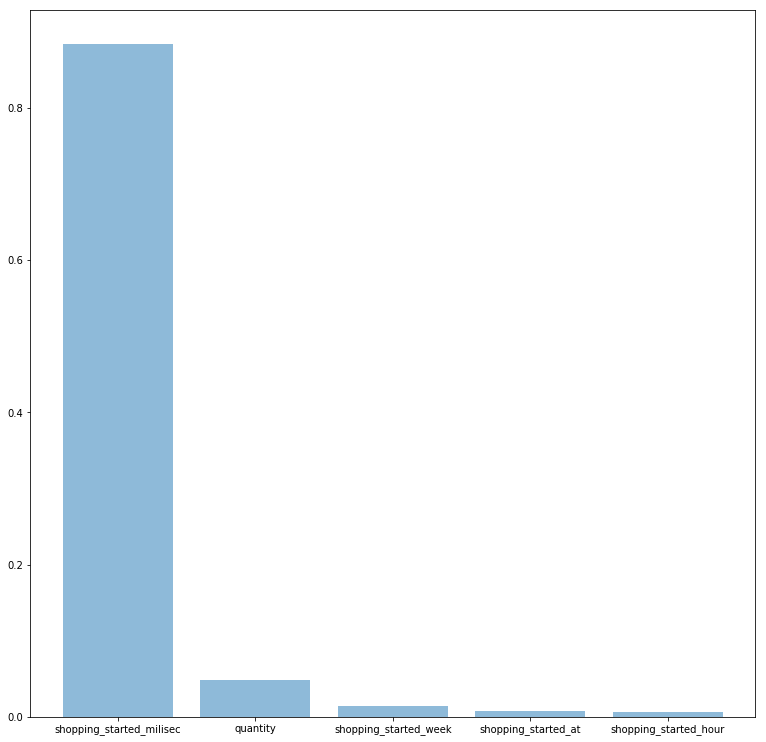

In [178]:
#Features Importance
plt.Figure(figsize=(20,20))
plt.bar(df_importance['Feature'], df_importance['Importance'], align='center', alpha=0.5,)
plt.gcf().set_size_inches(13, 13)